<a href="https://colab.research.google.com/github/mirzaaa101/Pairwise-Distance-Calculation-Python/blob/main/pairwise_distance_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances_chunked
import matplotlib.pyplot as plt

PATH = "/content/drive/MyDrive/Upwork/"
df = pd.read_excel(f"{PATH}sample_data.xlsx")
df.head()

,roofzipcode,rooflatitude,rooflongitude,code
0,75217-3525,32.72692,-96.64140,73443
1,75217-3157,32.74839,-96.64530,59321
2,75214-4004,32.81262,-96.73865,24757
3,75043-8909,32.86000,-96.61690,65139
4,75159-5104,32.59336,-96.55544,68892


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93137 entries, 0 to 93136
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   roofzipcode    93137 non-null  object 
 1   rooflatitude   93137 non-null  float64
 2   rooflongitude  93137 non-null  float64
 3   code           93137 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB


In [5]:
df.describe()

,rooflatitude,rooflongitude,code
count,93137.000000,93137.000000,93137.000000
mean,32.888681,-96.778402,51809.500349
std,0.176924,0.172466,29849.812742
min,32.228690,-97.202800,1.000000
25%,32.743450,-96.892180,26000.000000
50%,32.891330,-96.776450,51827.000000
75%,33.021480,-96.666460,77635.000000
max,33.560910,-94.852430,103486.000000


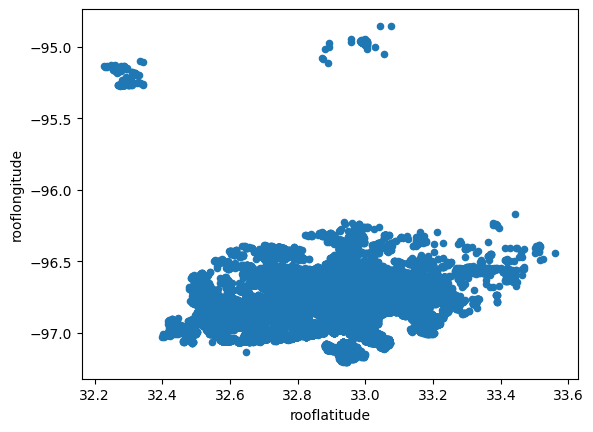

In [6]:
df.plot(kind="scatter", x="rooflatitude", y= "rooflongitude")
plt.show()

In [7]:
X = np.array(df[["rooflatitude", "rooflongitude"]].values)
X.shape

(93137, 2)

**Calculating Pairwise Matrix Using Chunks as The Matrix is Large**

In [8]:
os.makedirs(f'{PATH}distance_chunks', exist_ok=True)
chunk_dir = f'{PATH}/distance_chunks'

In [9]:
df['within_50m'] = 0
df['within_100m'] = 0

dist_50m = 0.00045  # approximate degree difference for 50 meters
dist_100m = 0.00090

In [10]:
start_idx = 0
chunk_index = 0

for chunk in pairwise_distances_chunked(X, working_memory=1000):
    within_50m_counts = (chunk < dist_50m).sum(axis=1)
    within_100m_counts = (chunk < dist_100m).sum(axis=1)

    chunk_size = chunk.shape[0]
    end_idx = start_idx + chunk_size

    df.loc[start_idx:end_idx-1, 'within_50m'] += within_50m_counts
    df.loc[start_idx:end_idx-1, 'within_100m'] += within_100m_counts

    chunk_file = os.path.join(chunk_dir, f'chunk_{chunk_index}.npy')
    np.save(chunk_file, chunk)
    print(f"Chunk-{chunk_index+1} has been saved.")

    start_idx = end_idx
    chunk_index += 1

Chunk-1 has been saved.
Chunk-2 has been saved.
Chunk-3 has been saved.
Chunk-4 has been saved.
Chunk-5 has been saved.
Chunk-6 has been saved.
Chunk-7 has been saved.
Chunk-8 has been saved.
Chunk-9 has been saved.
Chunk-10 has been saved.
Chunk-11 has been saved.
Chunk-12 has been saved.
Chunk-13 has been saved.
Chunk-14 has been saved.
Chunk-15 has been saved.
Chunk-16 has been saved.
Chunk-17 has been saved.
Chunk-18 has been saved.
Chunk-19 has been saved.
Chunk-20 has been saved.
Chunk-21 has been saved.
Chunk-22 has been saved.
Chunk-23 has been saved.
Chunk-24 has been saved.
Chunk-25 has been saved.
Chunk-26 has been saved.
Chunk-27 has been saved.
Chunk-28 has been saved.
Chunk-29 has been saved.
Chunk-30 has been saved.
Chunk-31 has been saved.
Chunk-32 has been saved.
Chunk-33 has been saved.
Chunk-34 has been saved.
Chunk-35 has been saved.
Chunk-36 has been saved.
Chunk-37 has been saved.
Chunk-38 has been saved.
Chunk-39 has been saved.
Chunk-40 has been saved.
Chunk-41 

In [11]:
df.to_excel(f"{PATH}output.xlsx", index=False)
df.head(50)

,roofzipcode,rooflatitude,rooflongitude,code,within_50m,within_100m
0,75217-3525,32.72692,-96.64140,73443,2,4
1,75217-3157,32.74839,-96.64530,59321,1,3
2,75214-4004,32.81262,-96.73865,24757,1,1
3,75043-8909,32.86000,-96.61690,65139,2,8
4,75159-5104,32.59336,-96.55544,68892,1,1
5,75150-1001,32.83130,-96.65472,90857,1,2
6,75034-5408,33.14553,-96.81394,32499,1,1
7,75409-4533,33.33441,-96.57247,25713,3,3
8,75051-4001,32.71890,-97.00178,52257,2,2
9,75225-4012,32.86511,-96.78980,30525,1,2
